In [12]:
!pip install torchattacks

In [13]:
!pip install evaluate_attacks

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

# Define transformations
transform = transforms.Compose([
    transforms.Resize(224),  # Resize the images to 224x224 pixels
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
val_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load pre-trained ResNet18 model
model = models.resnet18(pretrained=True)

# Freeze the parameters of the early layers
for param in model.parameters():
    param.requires_grad = False

# Modify the final layer to match the number of classes in CIFAR-10 (10 classes)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()

# Only parameters of the classifier are being updated
params_to_update = [p for p in model.parameters() if p.requires_grad]
optimizer = optim.SGD(params_to_update, lr=0.001, momentum=0.9)

# Determine if GPU is available and move the model to the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [16]:
# Save the trained model
model_path = '/content/drive/My Drive/weights/resnet18_finetuned.pth'
torch.save(model.state_dict(), model_path)
print(f'Model saved to {model_path}')

# Reinitialize the model
model = models.resnet18(pretrained=False)  # Initialize without pre-trained weights

# Modify the final layer to match the number of classes in CIFAR-10
model.fc = nn.Linear(num_ftrs, 10)

Model saved to /content/drive/My Drive/weights/resnet18_finetuned.pth


In [17]:
# Load the saved state dictionary
model = models.resnet18(pretrained=False)
# Freeze the parameters of the early layers
for param in model.parameters():
    param.requires_grad = False

# Modify the final layer to match the number of classes in CIFAR-10 (10 classes)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)

model_path = '/content/drive/My Drive/weights/resnet18_finetuned.pth'
model.load_state_dict(torch.load(model_path))

# Set the model to evaluation mode
model.eval()

print(f'Model loaded from {model_path}')

Model loaded from /content/drive/My Drive/weights/resnet18_finetuned.pth


In [18]:
import torch
import torchattacks
# Load CIFAR-10 dataset
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load pre-trained model
model = models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)  # Adjust for CIFAR-10
model.load_state_dict(torch.load('/content/drive/My Drive/weights/resnet18_finetuned.pth'))
model.eval()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

Files already downloaded and verified


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Success Rate of VNIFGSM attack: 0.0875


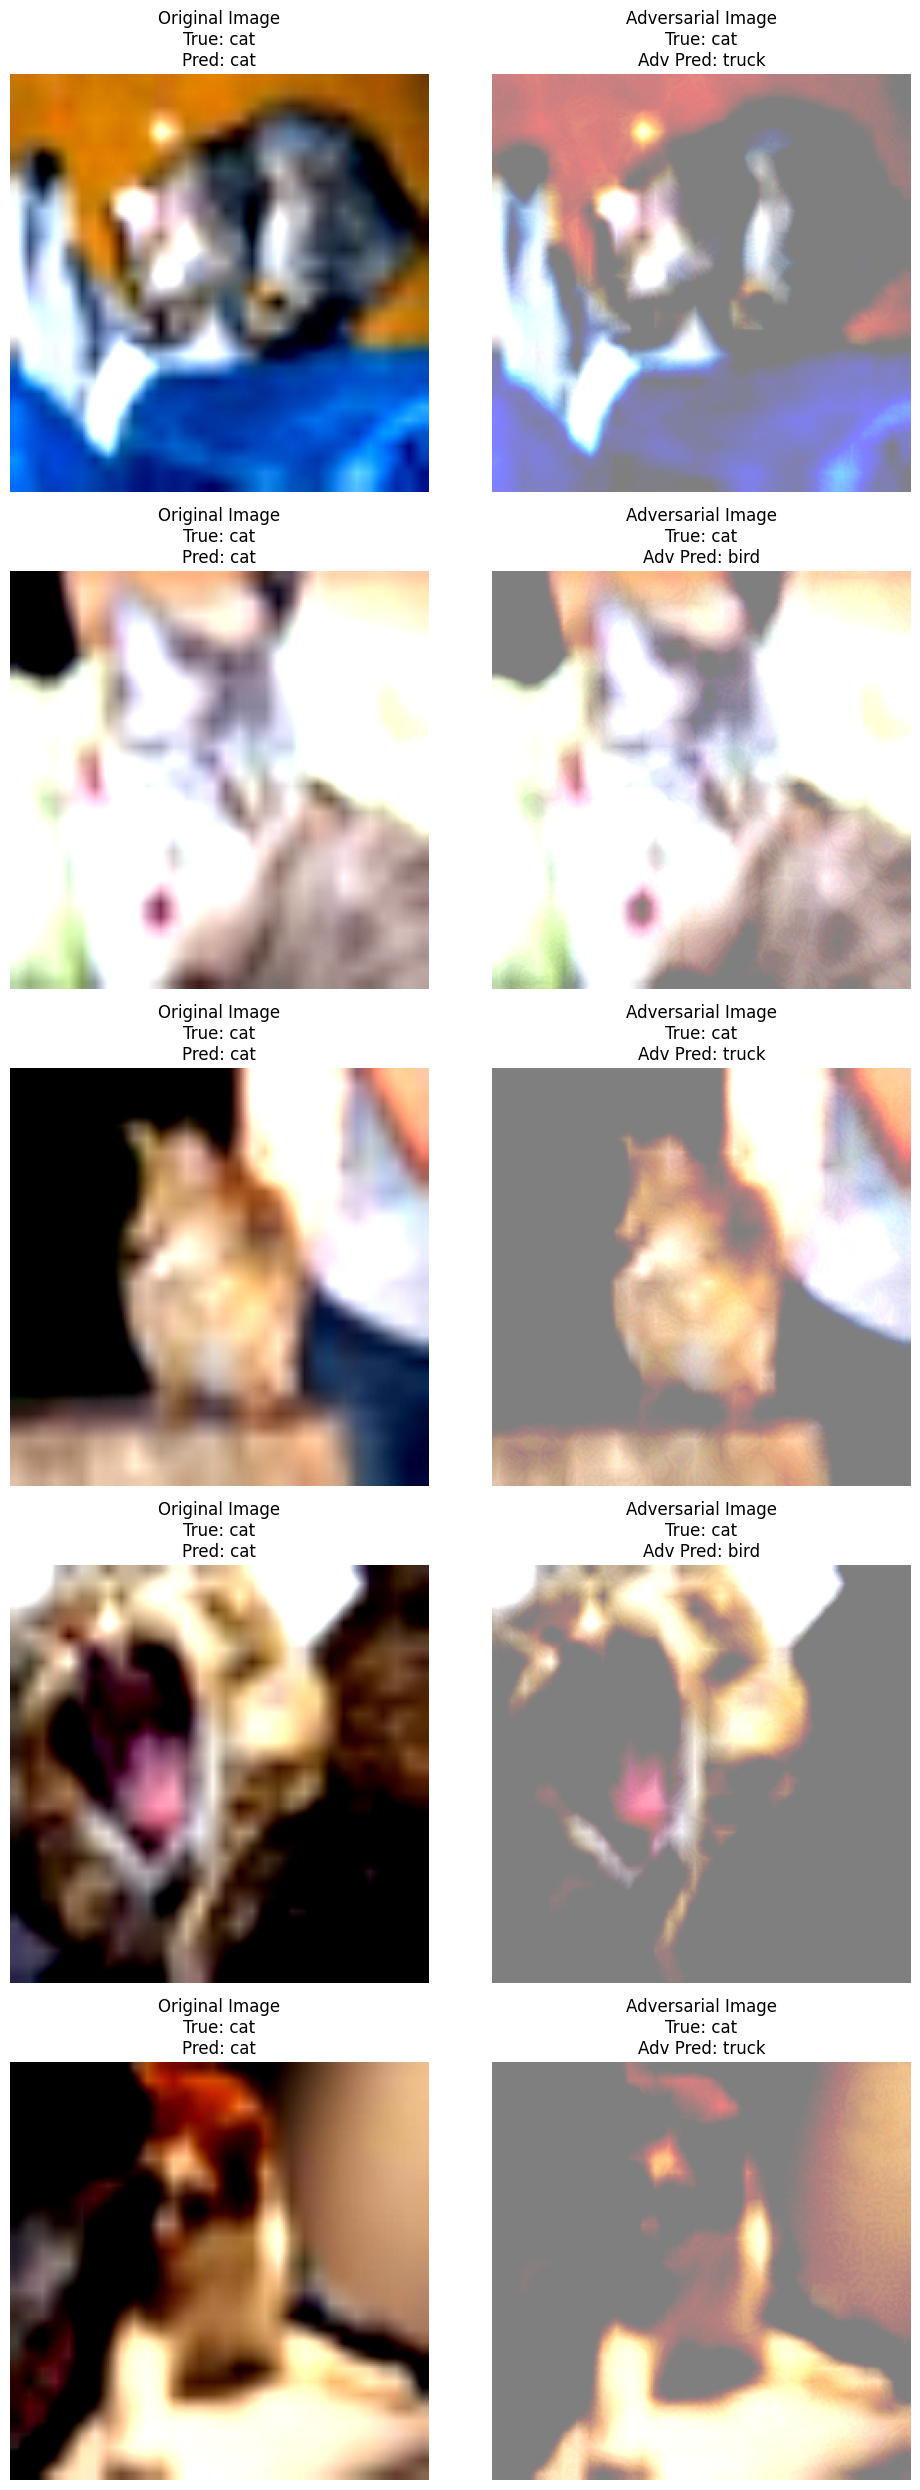

In [8]:
#VNIFGSM
from evaluate_attacks import attack_eval

attack_eval(torchattacks.VNIFGSM, model, test_loader, device)

Success Rate of UPGD attack: 0.0875


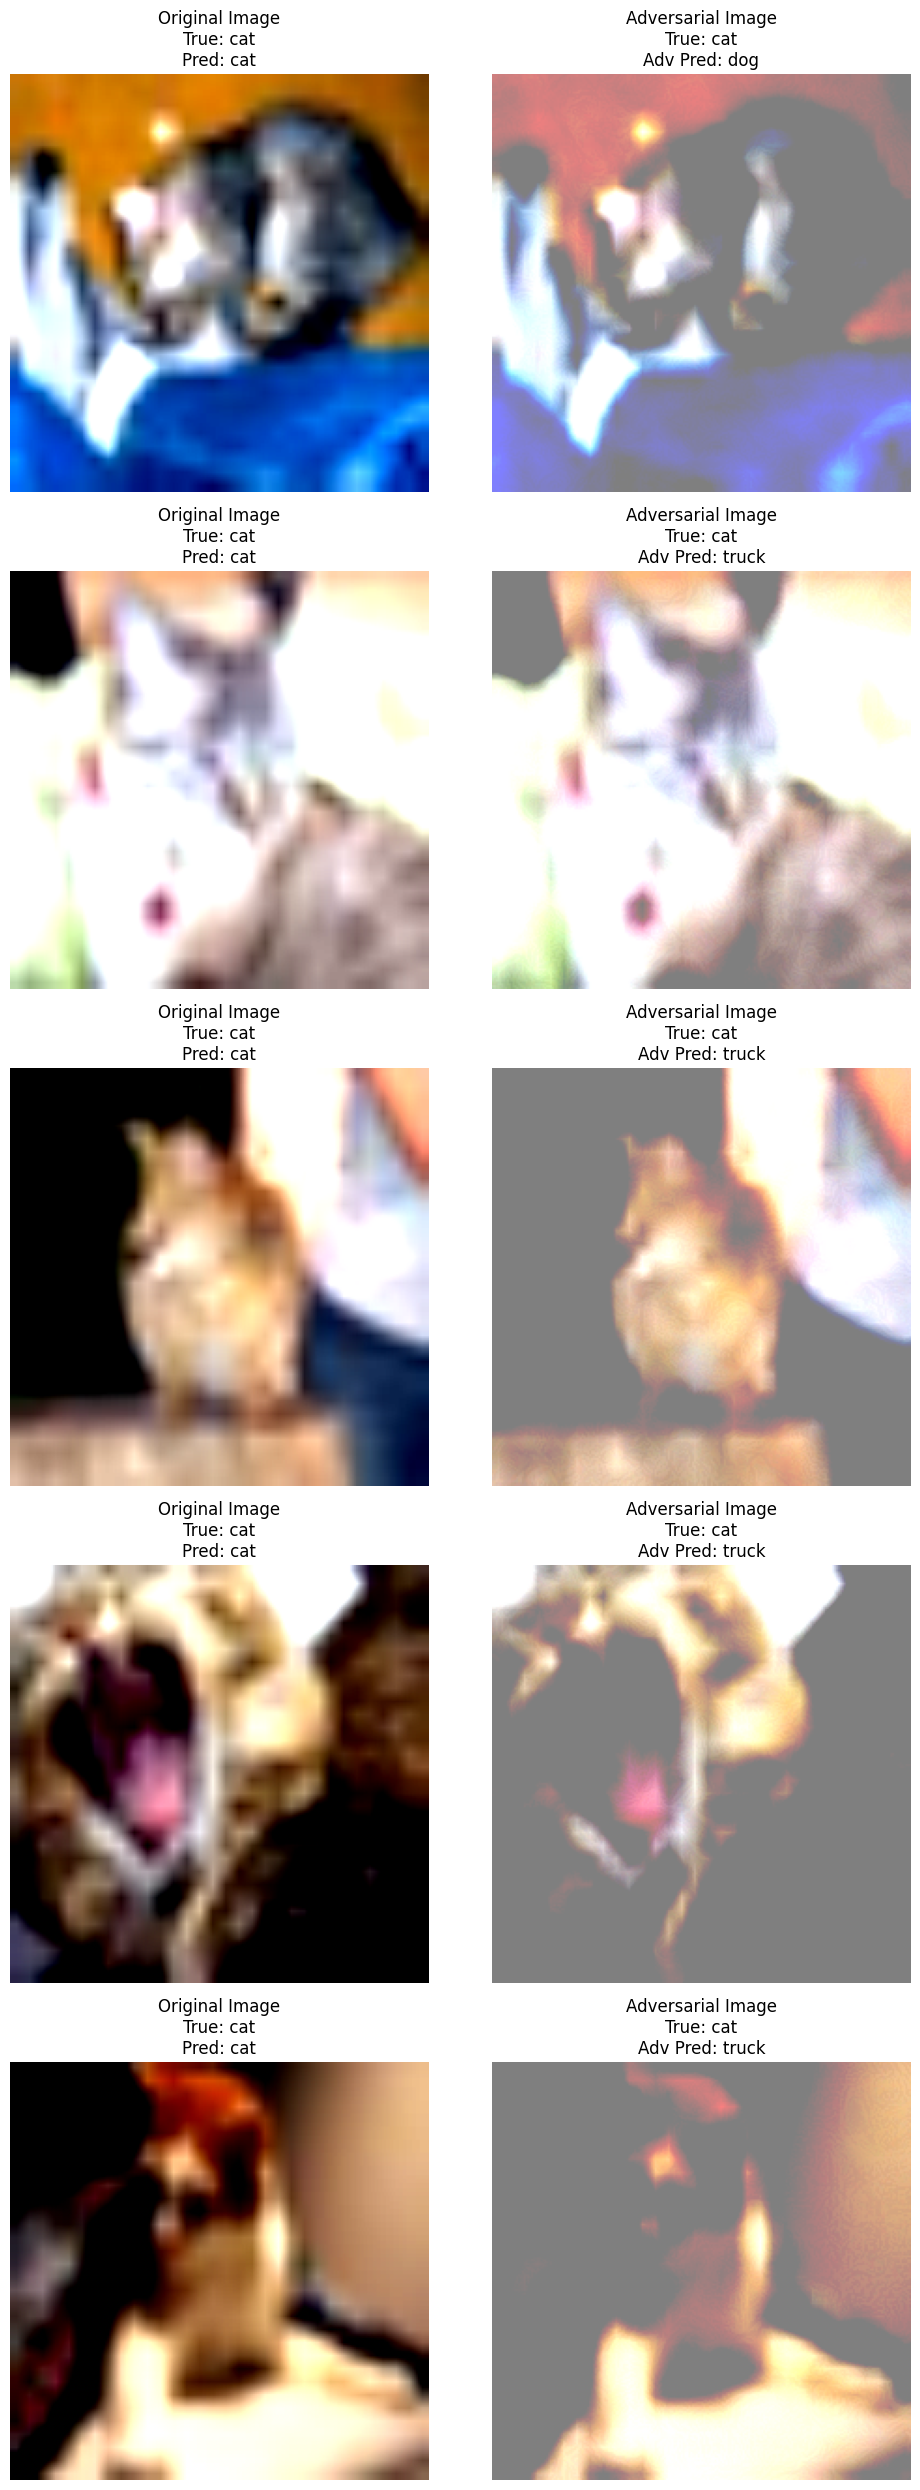

In [9]:
#UPGD
from evaluate_attacks import attack_eval

attack_eval(torchattacks.UPGD, model, test_loader, device)

Success Rate of APGDT attack: 0.1


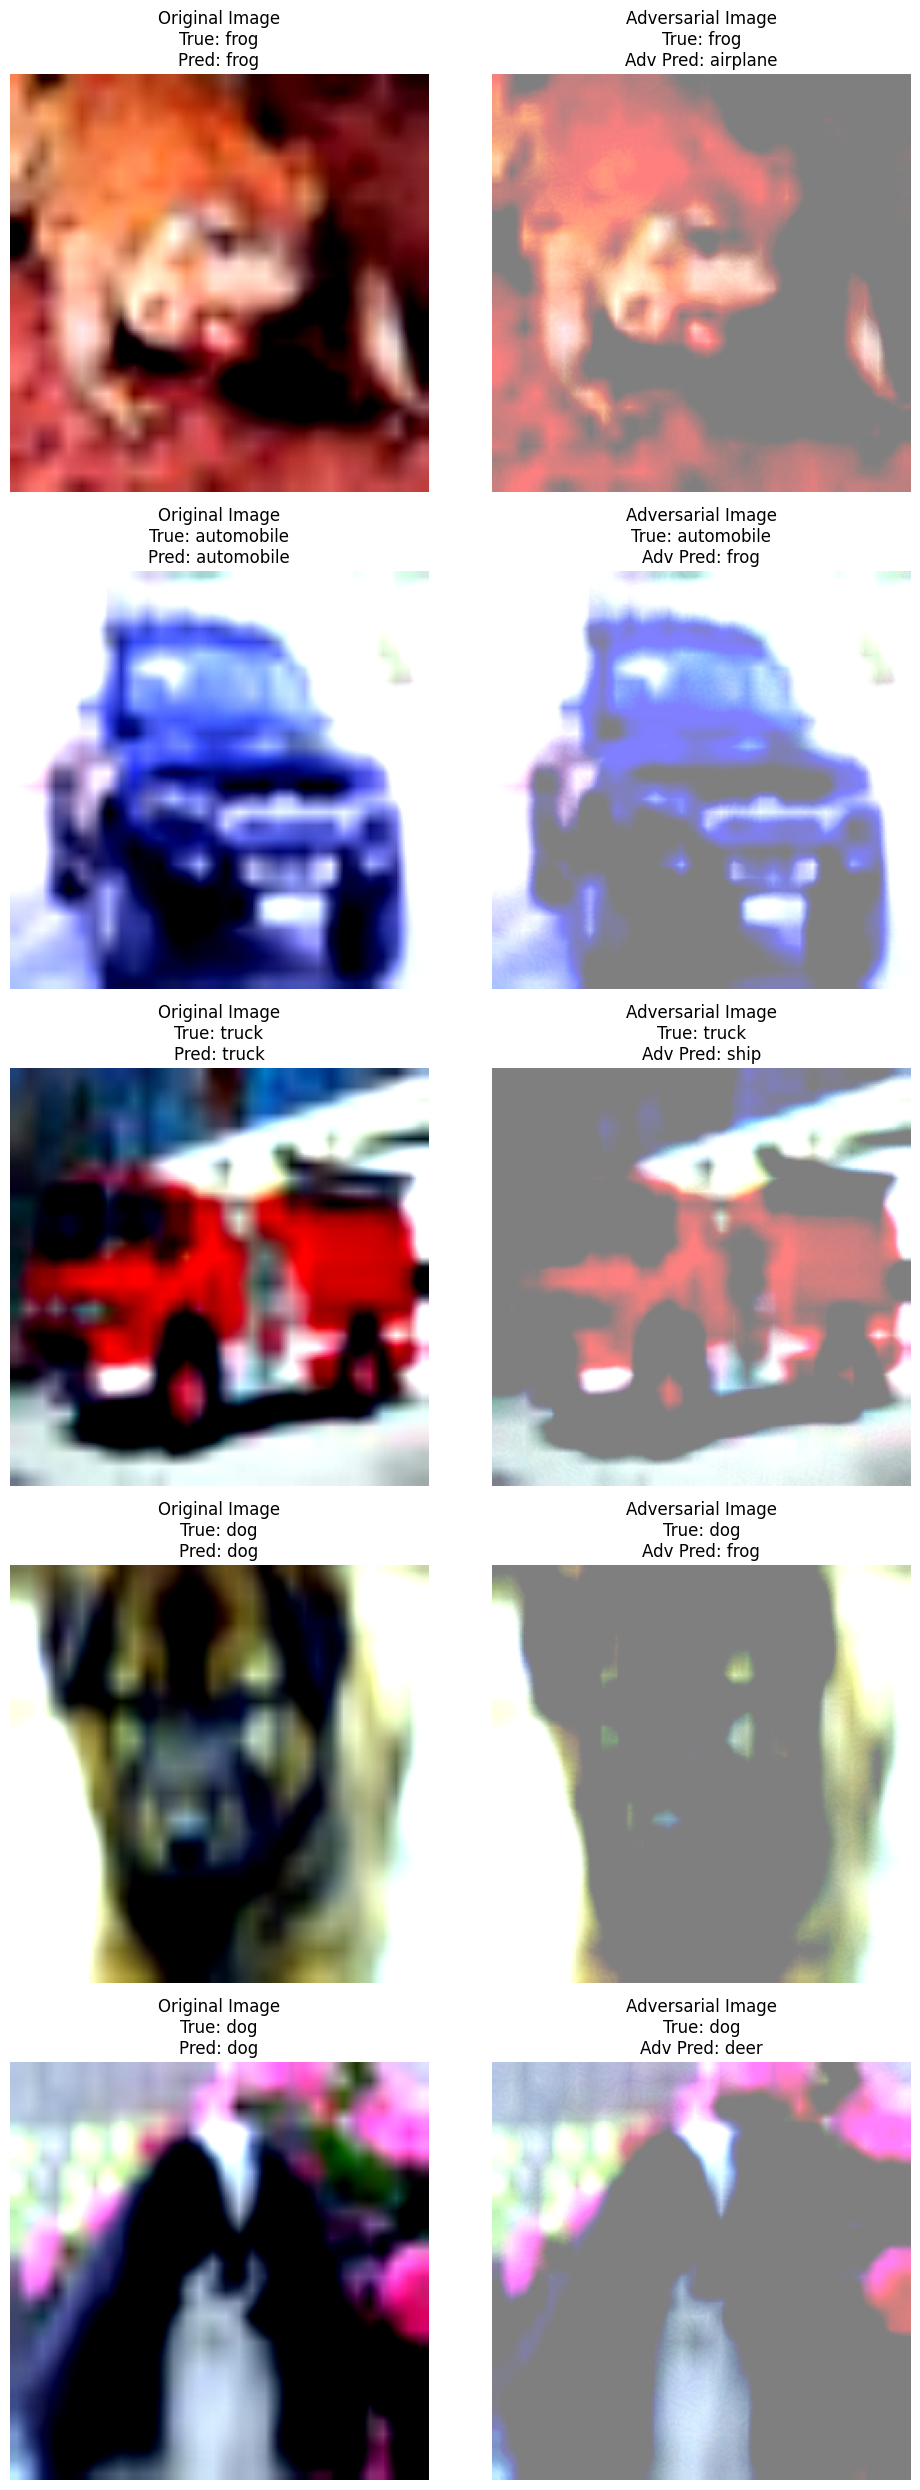

In [20]:
#APGDT
from evaluate_attacks import attack_eval

attack_eval(torchattacks.APGDT, model, test_loader, device)

Success Rate of DIFGSM attack: 0.0875


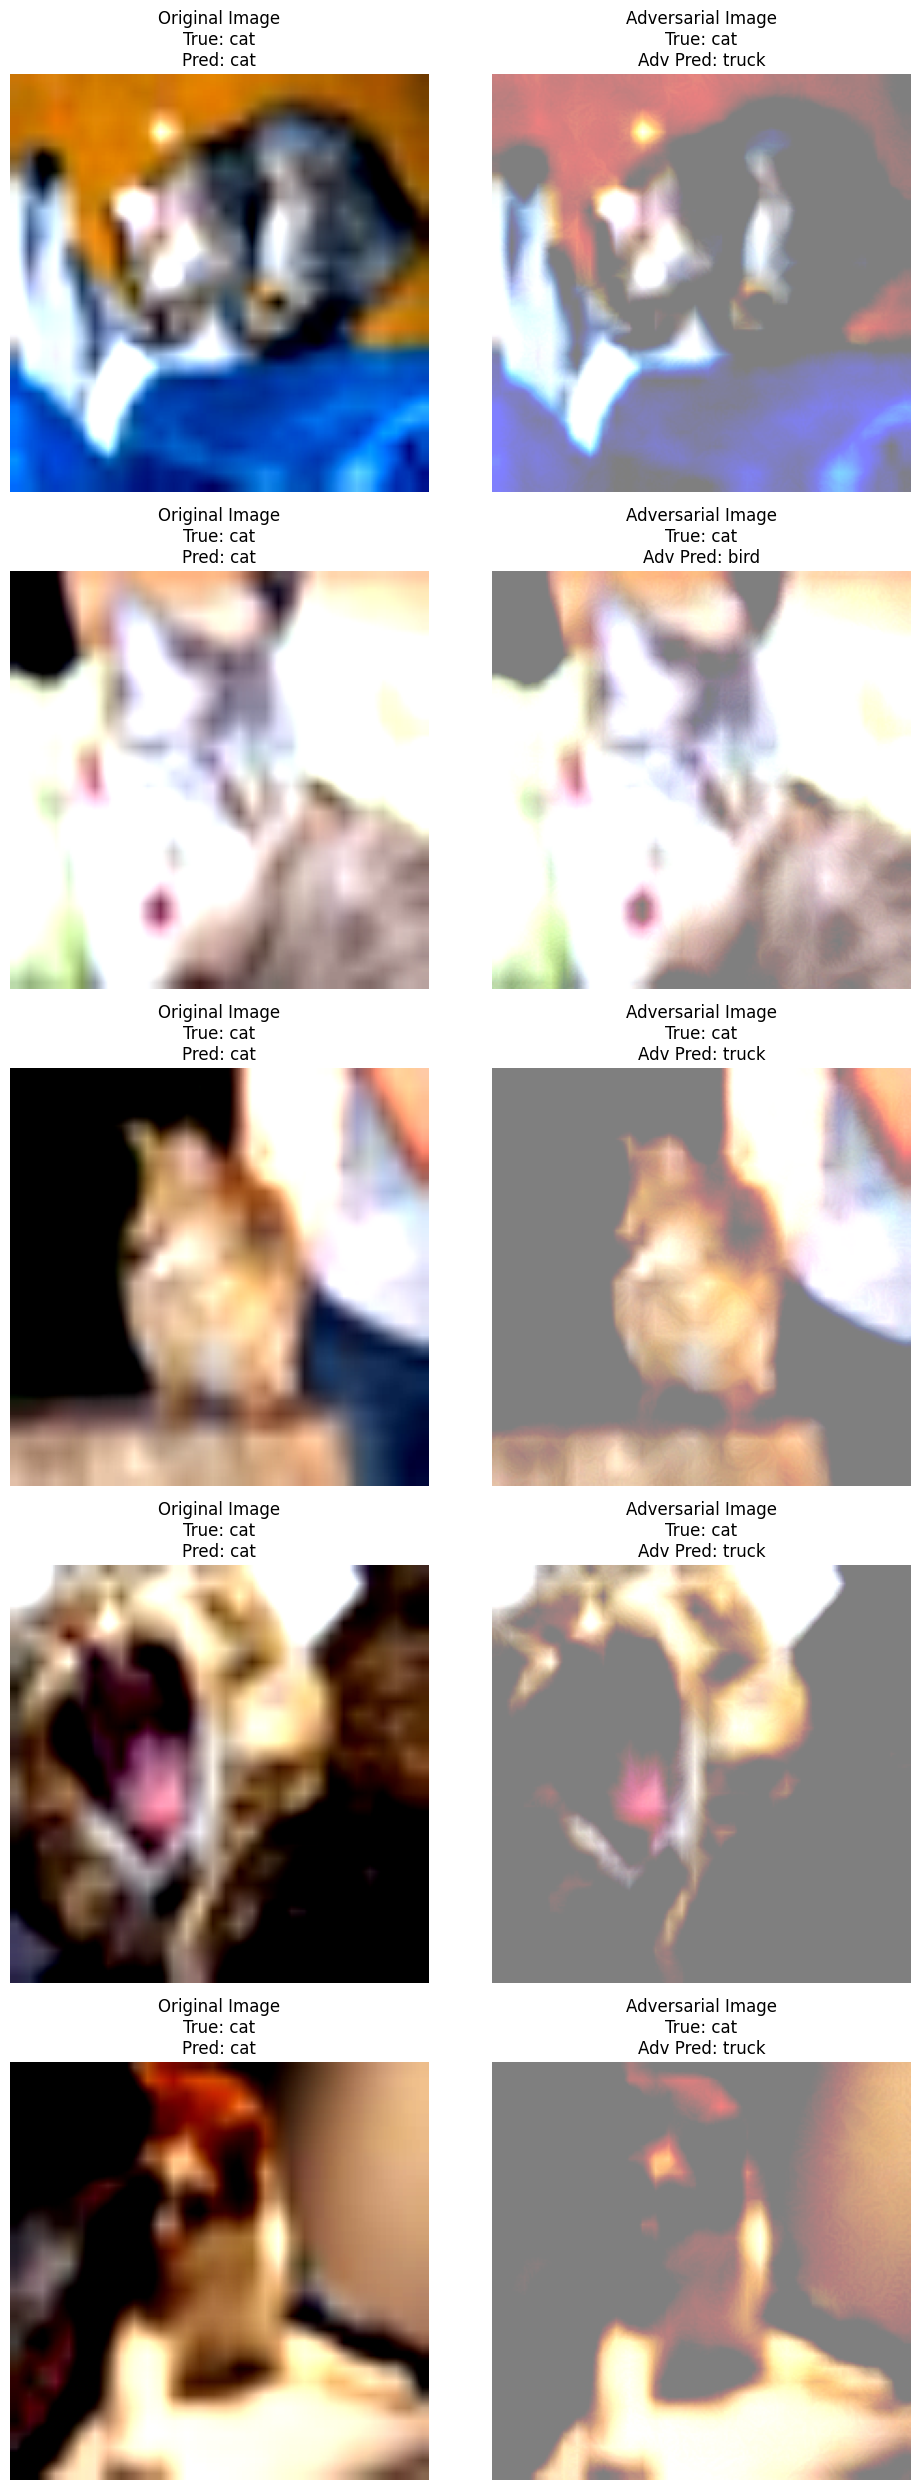

In [11]:
#DIFGSM
from evaluate_attacks import attack_eval

attack_eval(torchattacks.DIFGSM, model, test_loader, device)